Loaded 34 articles from classified_kpmg.json
Loaded 5 articles from classified_pwc.json


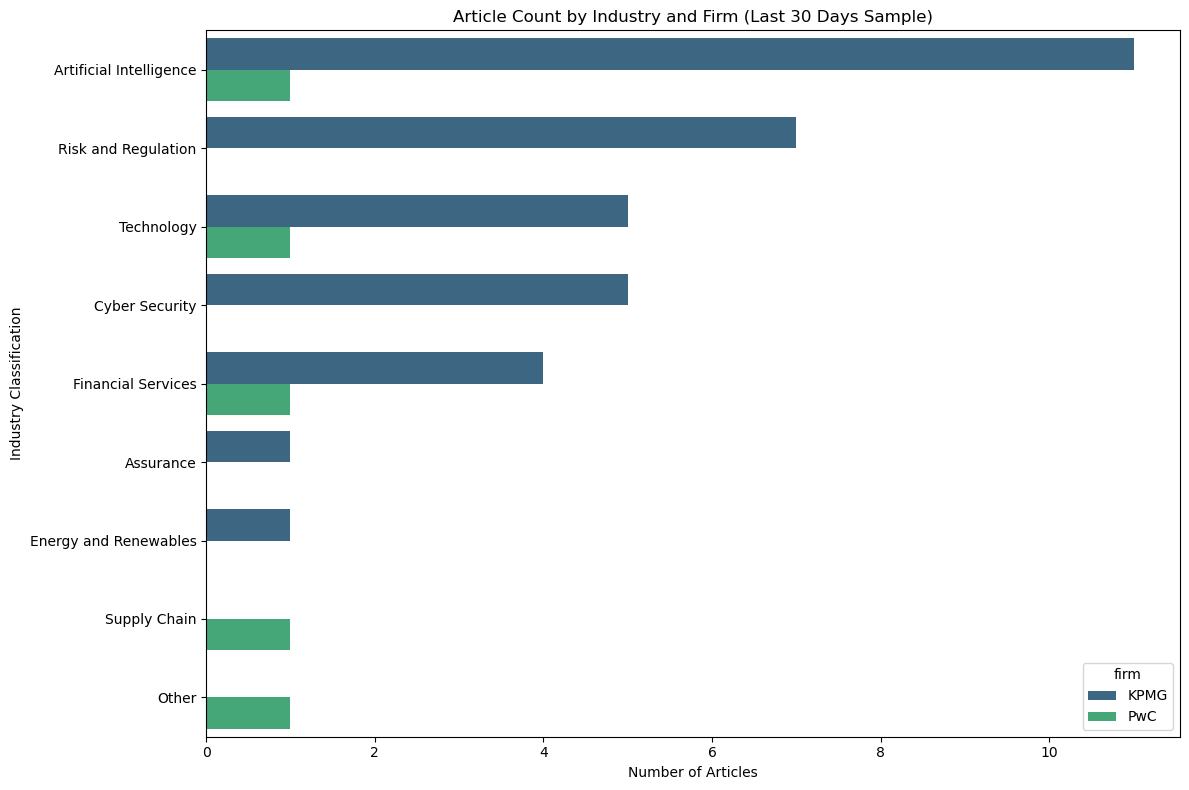


Loaded clustered data from clustered_analysis_results.json


C:\Users\Judge\AppData\Local\Temp\ipykernel_22260\1913978167.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Article Count', y='Cluster', data=df_clusters, palette='magma', orient='h')


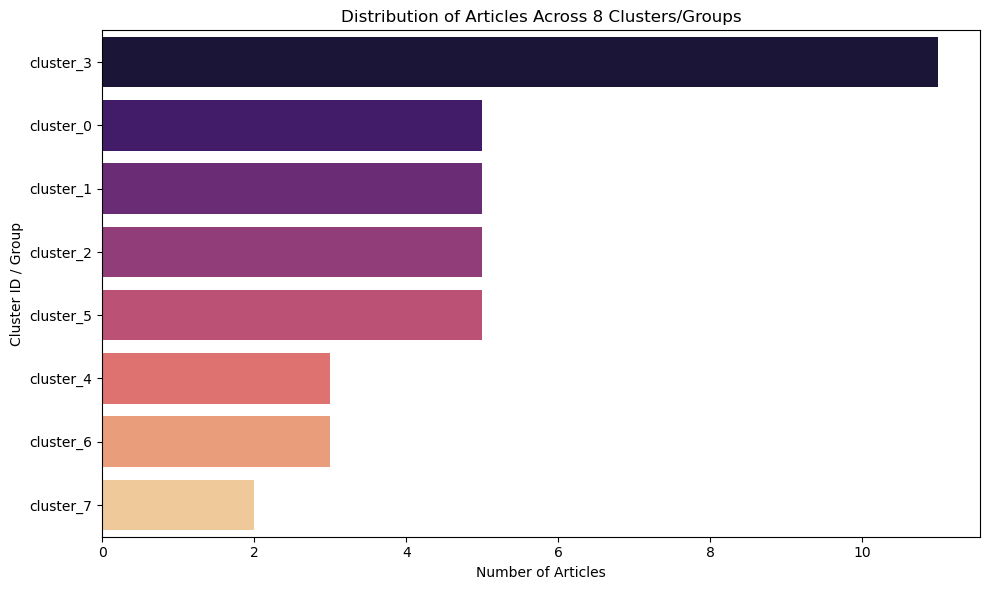

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 


# --- Visualization 1: Industry Distribution by Firm ---

# Define input file paths
classified_kpmg_path = 'classified_kpmg.json'
classified_pwc_path = 'classified_pwc.json'

# Load the classified data
kpmg_data = []
pwc_data = []
data_loaded = True

try:
    with open(classified_kpmg_path, 'r', encoding='utf-8') as f:
        kpmg_data = json.load(f)
    print(f"Loaded {len(kpmg_data)} articles from {classified_kpmg_path}")
except FileNotFoundError:
    print(f"Warning: File not found at {classified_kpmg_path}")
    data_loaded = False
except Exception as e:
    print(f"Error loading {classified_kpmg_path}: {e}")
    data_loaded = False

try:
    with open(classified_pwc_path, 'r', encoding='utf-8') as f:
        pwc_data = json.load(f)
    print(f"Loaded {len(pwc_data)} articles from {classified_pwc_path}")
except FileNotFoundError:
    print(f"Warning: File not found at {classified_pwc_path}")
    
    if not kpmg_data: data_loaded = False
except Exception as e:
    print(f"Error loading {classified_pwc_path}: {e}")
    data_loaded = False

if data_loaded and (kpmg_data or pwc_data):
    # Create DataFrames
    df_kpmg = pd.DataFrame(kpmg_data)
    df_pwc = pd.DataFrame(pwc_data)

    # Add a 'firm' column
    if not df_kpmg.empty:
        df_kpmg['firm'] = 'KPMG'
    if not df_pwc.empty:
        df_pwc['firm'] = 'PwC'

    # Combine DataFrames
    df_all = pd.concat([df_kpmg, df_pwc], ignore_index=True)

    # Plotting Industry Distribution
    if not df_all.empty:
        plt.figure(figsize=(12, 8))
        sns.countplot(y='industry', hue='firm', data=df_all,
                      order = df_all['industry'].value_counts().index,
                      palette='viridis')
        plt.title('Article Count by Industry and Firm (Last 30 Days Sample)')
        plt.xlabel('Number of Articles')
        plt.ylabel('Industry Classification')
        plt.tight_layout() 
        plt.show()
    else:
        print("Combined DataFrame is empty, cannot plot industry distribution.")
else:
    print("Could not load sufficient data for industry distribution plot.")


# --- Visualization 2: Thematic Cluster Distribution ---

cluster_file = 'clustered_analysis_results.json'
clustered_data = None

try:
    with open(cluster_file, 'r', encoding='utf-8') as f:
        clustered_data = json.load(f)
    print(f"\nLoaded clustered data from {cluster_file}")
except FileNotFoundError:
    print(f"Error: Clustered results file not found at {cluster_file}")
except Exception as e:
    print(f"Error loading {cluster_file}: {e}")

if clustered_data and isinstance(clustered_data, dict):
    cluster_counts = {name: len(articles) for name, articles in clustered_data.items() if name.startswith('cluster')}

    if not cluster_counts:
         if "unclustered_themes" in clustered_data:
             print("Data is unclustered. Plotting total count.")
             df_clusters = pd.DataFrame([{'Cluster': 'Unclustered', 'Article Count': len(clustered_data["unclustered_themes"])}])
         else:
             print("No cluster data found in the expected format.")
             df_clusters = pd.DataFrame() 
    else:
        df_clusters = pd.DataFrame(list(cluster_counts.items()), columns=['Cluster', 'Article Count'])
        df_clusters = df_clusters.sort_values('Article Count', ascending=False)
        
    # Plotting Cluster Distribution
    if not df_clusters.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Article Count', y='Cluster', data=df_clusters, palette='magma', orient='h')
        cluster_count_title = len(cluster_counts) if cluster_counts else 'Unclustered'
        plt.title(f'Distribution of Articles Across {cluster_count_title} Clusters/Groups')
        plt.xlabel('Number of Articles')
        plt.ylabel('Cluster ID / Group')
        plt.tight_layout()
        plt.show()
    else:
        print("No cluster data processed to visualize.")

else:
    print("Could not load clustered data or data is not in the expected dictionary format.")